# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('lung.csv')
df['status'] = df['status'] - 1
df.shape

(228, 10)

---
# 3. model 1

In [4]:
df = df.dropna(axis=0)
model = CoxPHFitter()
model.fit(df, "time", event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -491.27
         time fit was run = 2022-01-06 16:29:54 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.03       0.97       0.01            -0.06            -0.00                 0.95                 1.00
age         0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
sex        -0.57       0.57       0.20            -0.96            -0.17                 0.38                 0.84
ph.ecog     0.91       2.48       0.24             0.44             1.38                 1.55                 3.96
ph.karno    0.03       1.03       0.01             0.00             0.05                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
inst      -2.31   0.02       5.60
age        1.07   0.28       1.82
sex       -2.81 <0.005       7.68
ph.ecog    3.80 <0.005      12.77
ph.karno   2.29   0.02       5.49
pat.karno -1.34   0.18       2.47
meal.cal   0.01   0.99       0.01
wt.loss   -2.11   0.03       4.85
---
Concordance = 0.65
Partial AIC = 998.54
log-likelihood ratio test = 33.70 on 8 df
-log2(p) of ll-ratio test = 14.41

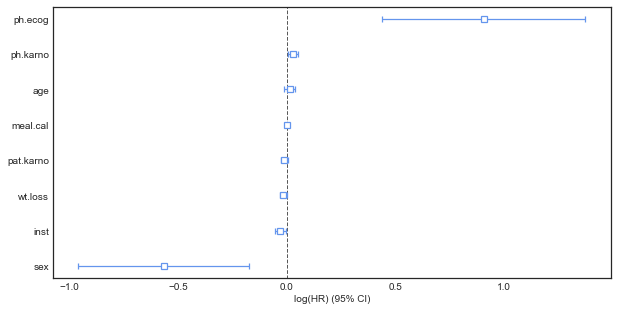

In [5]:
model.plot(color='cornflowerblue')

---
# 4. model 2

In [6]:
df = df.drop(['meal.cal','age','pat.karno'], axis=1)
model = CoxPHFitter()
model.fit(df, "time", event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -492.90
         time fit was run = 2022-01-06 16:29:55 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.03       0.97       0.01            -0.06            -0.00                 0.95                 1.00
sex        -0.57       0.56       0.20            -0.96            -0.18                 0.38                 0.83
ph.ecog     0.99       2.70       0.23             0.54             1.45                 1.71                 4.26
ph.karno    0.02       1.02       0.01            -0.00             0.04                 1.00                 1.04
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
inst      -2.32   0.02       5.63
sex       -2.88 <0.005       7.96
ph.ecog    4.28 <0.005      15.70
ph.karno   1.92   0.06       4.17
wt.loss   -1.93   0.05       4.22
---
Concordance = 0.64
Partial AIC = 995.79
log-likelihood ratio test = 30.44 on 5 df
-log2(p) of ll-ratio test = 16.34

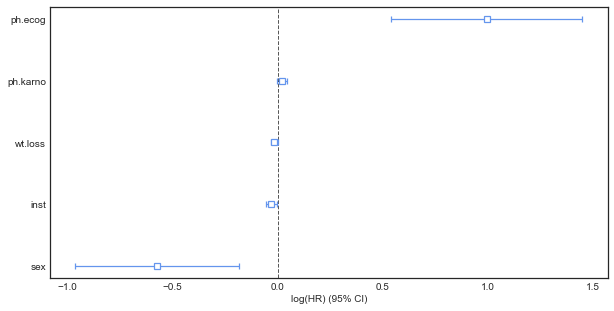

In [7]:
model.plot(color='cornflowerblue')

---
# 5. model 3

In [8]:
df = df.drop(['inst','ph.karno','wt.loss'], axis=1)
model = CoxPHFitter()
model.fit(df, "time", event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -498.38
         time fit was run = 2022-01-06 16:29:57 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex        -0.51       0.60       0.20            -0.90            -0.12                 0.41                 0.88
ph.ecog     0.48       1.62       0.13             0.22             0.74                 1.25                 2.10

              z      p   -log2(p)
covariate                        
sex       -2.59   0.01       6.71
ph.ecog    3.65 <0.005      11.88
---
Concordance = 0.64
Partial AIC = 1000.75
log-likelihood ratio test = 19.48 on 2 df
-log2(p) of ll-ratio test = 14.05

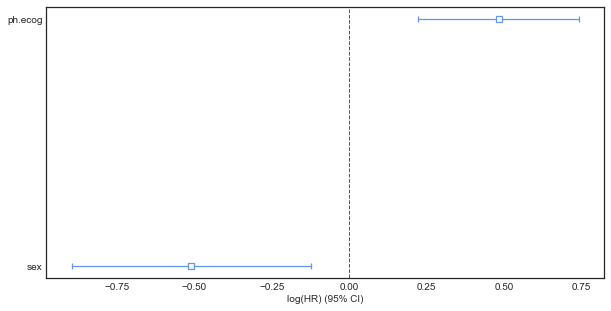

In [9]:
model.plot(color='cornflowerblue')